In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os.path
from pathlib import Path

import json
import pyam
import scmdata
import pandas as pd
import numpy as np
from pymagicc.io import MAGICCData

import utils

## plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
ID = "sb_noSRM_inclu"

<IPython.core.display.Javascript object>

In [4]:
data_all = pd.read_csv(
    str(Path(utils.DATA_DIR / "plotting_data" / "figure4" / f"{ID}_b.csv"))
)

<IPython.core.display.Javascript object>

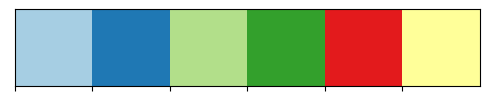

<IPython.core.display.Javascript object>

In [7]:
colors = [
    sns.color_palette("Paired")[0],
    sns.color_palette("Paired")[1],
    #  sns.color_palette("Paired")[11],
    sns.color_palette("Paired")[2],
    sns.color_palette("Paired")[3],
    sns.color_palette("Paired")[5],
    sns.color_palette("Paired")[10],
]
sns.palplot(colors)

In [9]:
data_all["Average annual NNEs"] = pd.cut(
    data_all["average_cdr_between_net0_and_15"],
    [-20, 1, 5, 15, 25, 45],
    labels=["< 1", "1 - 5", "5 - 15", "15 - 25", "> 25"],
)


<IPython.core.display.Javascript object>

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_4345/3157935031.py:29: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(


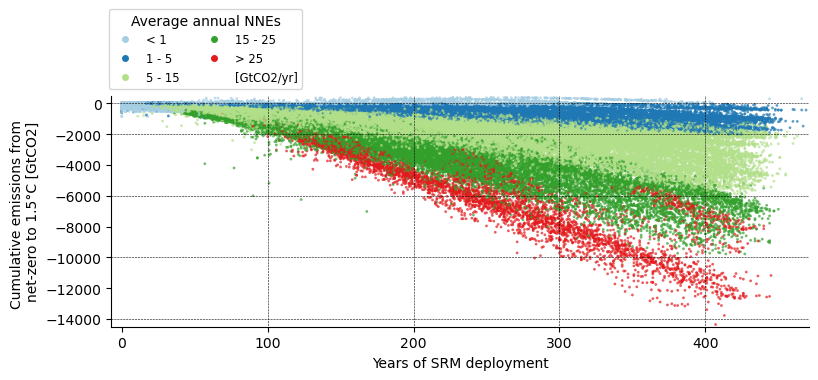

<IPython.core.display.Javascript object>

In [11]:
fig, ax = plt.subplots(figsize=(9, 3))

x = "cumulative_emms_net0_to_15"
y = "SRM_at_first_crossing"
hue = "Average annual NNEs"

plt.ylabel("Cumulative emissions from \nnet-zero to 1.5°C [GtCO2]")
plt.xlabel("Years of SRM deployment")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)
plt.ylim(-14500, 500)
plt.xlim(-7, 471)
ax.vlines(100, 1000, -14500, color="black", ls="--", lw=0.4)
ax.vlines(200, 1000, -14500, color="black", ls="--", lw=0.4)
ax.vlines(300, 1000, -14500, color="black", ls="--", lw=0.4)
ax.vlines(400, 1000, -14500, color="black", ls="--", lw=0.4)
ax.hlines(0, -7, 470, color="black", ls="--", lw=0.4)
ax.hlines(-2000, -7, 470, color="black", ls="--", lw=0.4)
# ax.hlines(-4000, -7, 470, color="black", ls="--", lw=0.4)
ax.hlines(-6000, -7, 470, color="black", ls="--", lw=0.4)
# ax.hlines(-8000, -7, 470, color="black", ls="--", lw=0.4)
ax.hlines(-10000, -7, 470, color="black", ls="--", lw=0.4)
# ax.hlines(-12000, -7, 470, color="black", ls="--", lw=0.4)
ax.hlines(-14000, -7, 470, color="black", ls="--", lw=0.4)


sns.scatterplot(
    data=data_all,
    x=y,
    y=x,
    hue=hue,
    palette=colors,
    alpha=0.7,
    s=4,
    ec=None,
    legend=True,
)


import matplotlib.lines as mlines

smaller1 = mlines.Line2D(
    [], [], color=colors[0], marker="o", linestyle="None", markersize=4, label="< 1"
)
CDR15 = mlines.Line2D(
    [], [], color=colors[1], marker="o", linestyle="None", markersize=4, label="1 - 5"
)
CDR515 = mlines.Line2D(
    [], [], color=colors[2], marker="o", linestyle="None", markersize=4, label="5 - 15"
)
CDR1525 = mlines.Line2D(
    [], [], color=colors[3], marker="o", linestyle="None", markersize=4, label="15 - 25"
)
larger25 = mlines.Line2D(
    [], [], color=colors[4], marker="o", linestyle="None", markersize=4, label="> 25"
)
unit = mlines.Line2D(
    [],
    [],
    color="white",
    marker="o",
    linestyle="None",
    markersize=4,
    label="[GtCO2/yr]",
)

cur_pol = mlines.Line2D(
    [],
    [],
    color="black",
    marker="o",
    linestyle="None",
    markersize=4,
    label="current 2100 NDC-projections",
)


plt.legend(
    title="Average annual NNEs",
    fontsize="small",
    bbox_to_anchor=(0.282, 1.4),
    ncol=2,
    handles=[smaller1, CDR15, CDR515, CDR1525, larger25, unit],
)
# ax.invert_xaxis()
# plt.tight_layout()
plt.savefig(str(Path(utils.PLOTS_DIR / "figure4" / f"{ID}_b.png")), bbox_inches="tight")
plt.show()

### Random plotting

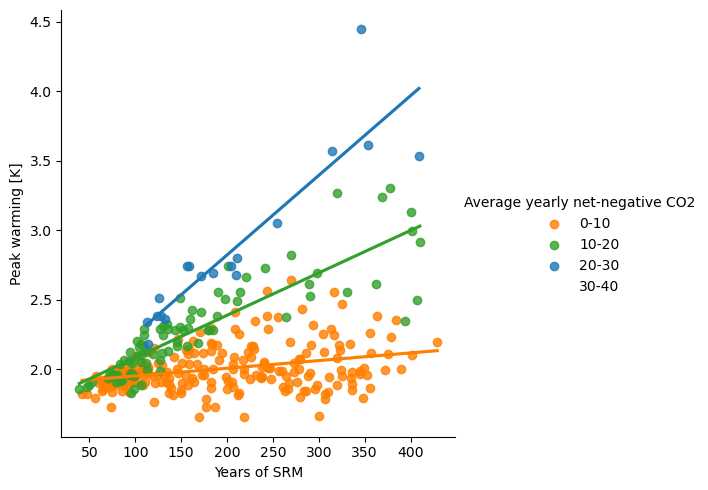

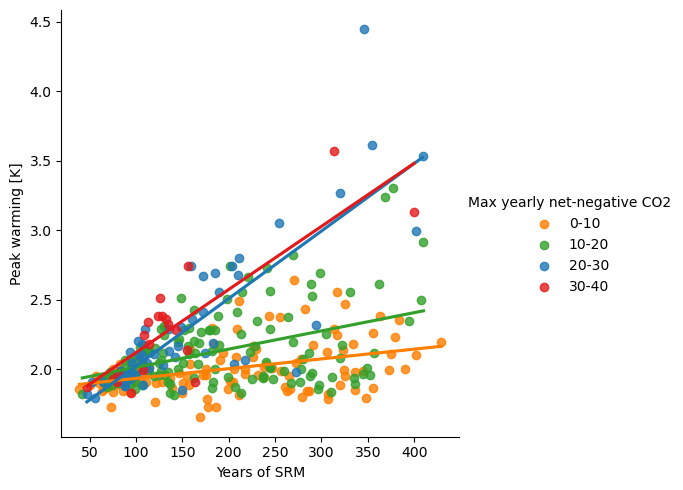

<IPython.core.display.Javascript object>

In [12]:
def plot(d, CDR):
    if d == "all":
        data = data_all
    elif d == "median":
        data = data_median

    if CDR == "mean":
        CDR_column = "average_cdr_between_peak_and_15_temp"
        CDR_long = "Average yearly net-negative CO2"
    elif CDR == "max":
        CDR_column = "max_CDR"
        CDR_long = "Max yearly net-negative CO2"

    ## CDR categories
    data[CDR_long] = pd.cut(
        data[CDR_column],
        [0, 10, 20, 30, 40],
        labels=["0-10", "10-20", "20-30", "30-40"],
    )

    g = sns.lmplot(x="SRM_years", y="peak_warming", data=data, hue=CDR_long,
   order=1, ci=False, palette=colors)
    

    plt.xlabel("Years of SRM")
    plt.ylabel("Peak warming [K]")


    ##### Changing legend doesn't work
    # new_title = 'Max yearly CDR'
    # g._legend.set_title(new_title)
    # replace labels
    # new_labels = ['label 1', 'label 2']
    # for t, l in zip(g._legend.texts, new_labels):
    #    t.set_text(l)
    # plt.legend(title='Max yearly CDR', loc='upper left', labels=['0-10', '10-20', '20-30', '30-40'])

    plt.show(g)
    g.savefig(str(Path(utils.PLOTS_DIR / "figure2" / f"{ID}_fig2_{d}ms_{CDR}CDR.png")))


plot(
    "median",  # median / all    (all ensemble members or median)
    "mean",  # mean / max    (mean CDR btw peak and 1.5°C or max CDR)
)

plot(
    "median",
    "max",
)


/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_3349/3186311535.py:21: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  g = sns.scatterplot(x="SRM_years", y="peak_warming", data=data, hue=CDR_long,


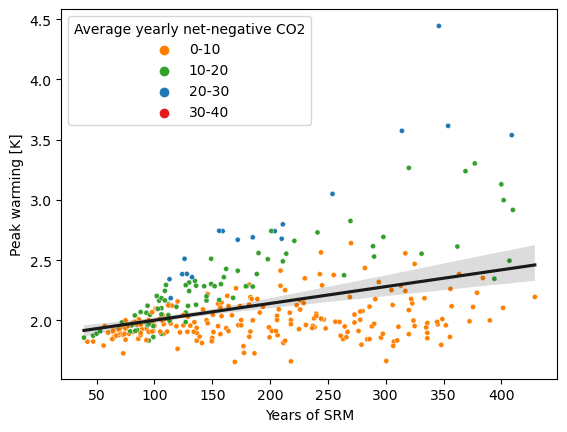

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_3349/3186311535.py:21: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  g = sns.scatterplot(x="SRM_years", y="peak_warming", data=data, hue=CDR_long,


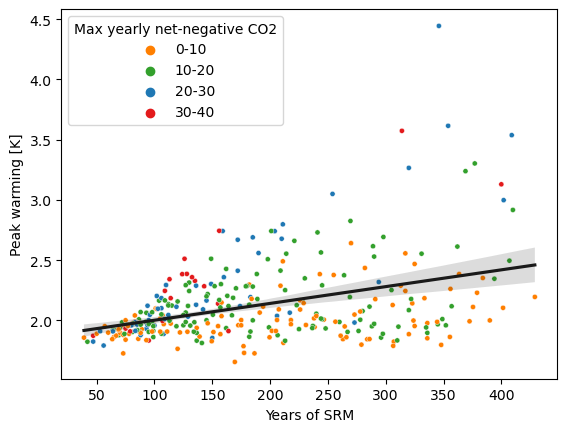

<IPython.core.display.Javascript object>

In [13]:
def plot(d, CDR):
    if d == "all":
        data = data_all
    elif d == "median":
        data = data_median

    if CDR == "mean":
        CDR_column = "average_cdr_between_peak_and_15_temp"
        CDR_long = "Average yearly net-negative CO2"
    elif CDR == "max":
        CDR_column = "max_CDR"
        CDR_long = "Max yearly net-negative CO2"

    ## CDR categories
    data[CDR_long] = pd.cut(
        data[CDR_column],
        [0, 10, 20, 30, 40],
        labels=["0-10", "10-20", "20-30", "30-40"],
    )

    g = sns.scatterplot(x="SRM_years", y="peak_warming", data=data, hue=CDR_long,
            palette=colors, s = 14) #set style options
    
    g = sns.regplot(data=data, x="SRM_years", y="peak_warming", scatter=False, color=".1")

    plt.xlabel("Years of SRM")
    plt.ylabel("Peak warming [K]")

    plt.savefig(str(Path(utils.PLOTS_DIR / "figure2" / f"{ID}_fig2_{d}ms_{CDR}CDR.png")))
    plt.show()

plot(
    "median",  # median / all    (all ensemble members or median)
    "mean",  # mean / max    (mean CDR btw peak and 1.5°C or max CDR)
)

plot(
    "median",
    "max",
)


# Boxplots

In [12]:
data_all["Average yearly net-negative CO2"] = pd.cut(
    data_all["average_cdr_between_peak_and_15_temp"],
    [0, 10, 20, 30, 40],
    labels=["0-10", "10-20", "20-30", "30-40"],
)
data_all["Peak Warming"] = pd.cut(
    data_all["peak_warming"],
    [0, 2, 2.5, 2.9, 4.1],
    labels=["<2°C", "2.4 °C", "2.8 °C", "4.0 °C"],
)

data_all["SRM years"] = pd.cut(
    data_all["SRM_years"],
    [0, 100, 200, 300, 400, 500],
    labels=["100", "200", "300", "400", "500"],
)

data_all["Net Emissions"] = pd.cut(
    data_all["net_emissions"],
    [0, 1000, 1500, 2000, 2500, 3000, 10000],
    labels=["<1000", "1000-1500", "1500-2000", "2000-2500", "2500-3000", ">3000"],
)

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='SRM years', ylabel='net_emissions'>

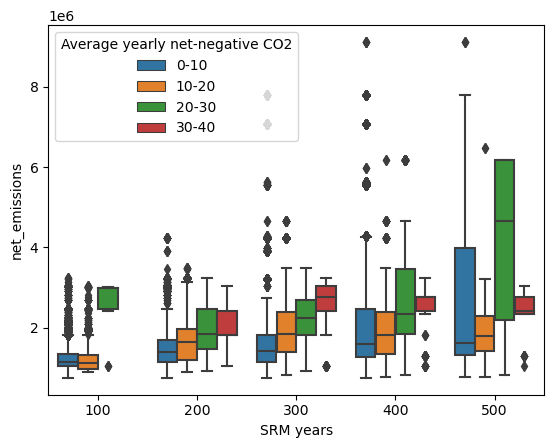

<IPython.core.display.Javascript object>

In [27]:
sns.boxplot(data=data_all, x="SRM years", y="net_emissions", hue="Average yearly net-negative CO2")


<AxesSubplot: xlabel='Net Emissions', ylabel='average_cdr_between_peak_and_15_temp'>

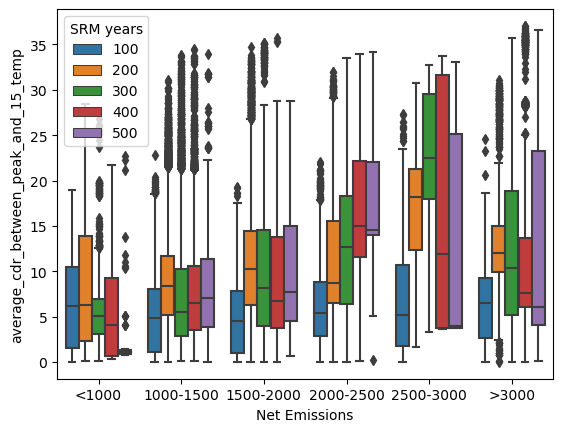

<IPython.core.display.Javascript object>

In [13]:
sns.boxplot(data=data_all, x="Net Emissions", y="average_cdr_between_peak_and_15_temp", hue="SRM years")


<AxesSubplot: xlabel='SRM years', ylabel='TCRE'>

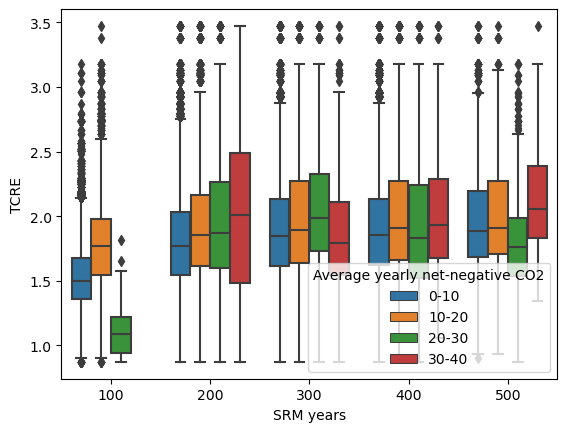

<IPython.core.display.Javascript object>

In [33]:
sns.boxplot(data=data_all, x="SRM years", y="TCRE", hue="Average yearly net-negative CO2")


<AxesSubplot: xlabel='Average yearly net-negative CO2', ylabel='SRM_years'>

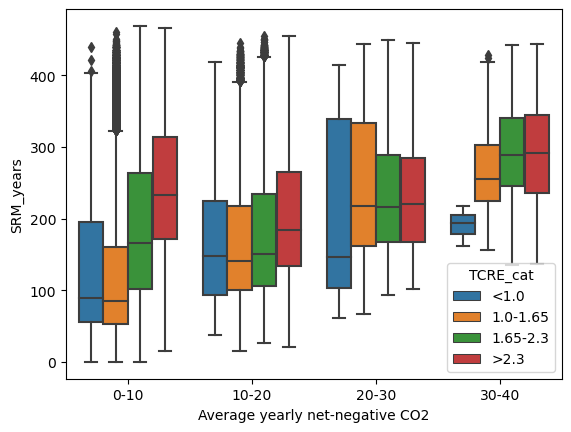

<IPython.core.display.Javascript object>

In [35]:
sns.boxplot(data=data_all, x="Average yearly net-negative CO2", y="SRM_years", hue="TCRE_cat")
